In [36]:
# Importing libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import pickle
from skimage.transform import resize
from skimage.io import imread
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix


In [ ]:
# ======================= Preparing Dateset ==============================
# =======================From CSV file, I created separate directory for each ======
# category i.e, 0--9 and saved images into the folder

In [52]:
path = '/home/prabin/Downloads/handwritten_digit_corpus/images.csv'
df = pd.read_csv(path)
columns = ['images', 'label']
df.columns = columns
df.head()

,images,label
0,2_01.png,2
1,1_01.png,1
2,0_01.png,0
3,4_01.png,4
4,1_02.png,1


In [53]:
os.path.abspath('/home/prabin/Downloads/handwritten_digit_corpus/images.csv')

'/home/prabin/Downloads/handwritten_digit_corpus/images.csv'

In [ ]:
import cv2
for i in range(len(df)):
    if os.path.exists('/home/prabin/Downloads/handwritten_images/{}'.format(df['label'][i])):
        image = cv2.imread('/home/prabin/Downloads/handwritten_digit_corpus/{}'.format(df['images'][i]))
        cv2.imwrite('/home/prabin/Downloads/handwritten_images/{}/{}'.format(df['label'][i], df['images'][i]), image)
        os.remove('/home/prabin/Downloads/handwritten_digit_corpus/{}'.format(df['images'][i]))
    else:
        os.mkdir('/home/prabin/Downloads/handwritten_images/{}'.format(df['label'][i]))
        image = cv2.imread('/home/prabin/Downloads/handwritten_digit_corpus/{}'.format(df['images'][i]))
        cv2.imwrite('/home/prabin/Downloads/handwritten_images/{}/{}'.format(df['label'][i], df['images'][i]), image)
        os.remove('/home/prabin/Downloads/handwritten_digit_corpus/{}'.format(df['images'][i]))

In [ ]:
# ================== CODE FOR MODEL STARTS HERE ===============================

In [2]:
DATADIR = '/home/prabin/Downloads/handwritten_images/'
CATEGORIES = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
IMG_SIZE=28

In [12]:
# Count of data sample in each category:
for i in CATEGORIES:
    list_ = os.listdir(DATADIR+'/'+i)
    print("LABEL", i, "--------->", "DATA SAMPLES", len(list_))

LABEL 0 ---------> DATA SAMPLES 980
LABEL 1 ---------> DATA SAMPLES 1135
LABEL 2 ---------> DATA SAMPLES 1032
LABEL 3 ---------> DATA SAMPLES 1010
LABEL 4 ---------> DATA SAMPLES 982
LABEL 5 ---------> DATA SAMPLES 892
LABEL 6 ---------> DATA SAMPLES 958
LABEL 7 ---------> DATA SAMPLES 1028
LABEL 8 ---------> DATA SAMPLES 974
LABEL 9 ---------> DATA SAMPLES 1009


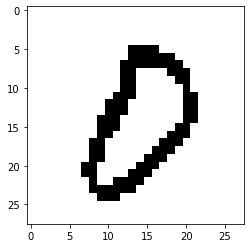

In [13]:
# Randomly looking the dataset image
for category in CATEGORIES:
    path=os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        plt.imshow(img_array)
        plt.show()
        break
    break

In [14]:
# Preparing dataset
training_data=[]
def create_training_data():
    for category in CATEGORIES:
        path=os.path.join(DATADIR, category)
        class_num=CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
create_training_data()   

In [15]:
# Data sample
img = cv2.imread('/home/prabin/Downloads/handwritten_images/1/1_01.png')
arr = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
arr.shape

(28, 28, 3)

In [16]:
lenofimage = len(training_data)

In [17]:
X=[]
y=[]

for image, label in training_data:
    X.append(image)
    y.append(label)

# flattening images into 2D, i.e, (1000, 28*28*3)
X= np.array(X).reshape(lenofimage,-1)

In [18]:
# Normalizing the image
X = X/255.0

In [19]:
X.shape

(10000, 2352)

In [20]:
# Converting list of labels into array of labels
y=np.array(y)
y

array([0, 0, 0, ..., 9, 9, 9])

In [21]:
y.shape

(10000,)

In [22]:
# Data after flattening the images
df=pd.DataFrame(X)
df['Target']=y
df

,0,1,2,3,4,5,6,7,8,9,...,2343,2344,2345,2346,2347,2348,2349,2350,2351,Target
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,9
9996,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,9
9997,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,9
9998,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,9


In [23]:
# splitting data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20)

In [24]:
print("Training Data:", len(X_train))
print("Test Data:", len(X_test))

Training Data: 8000
Test Data: 2000


In [54]:
# from sklearn.model_selection import GridSearchCV

# param_grid={'C':[0.1,1,10,100],'gamma':[0.0001,0.001,0.1,1],'kernel':['rbf','poly']}
# svc=svm.SVC(probability=True)
# print("===================TRAINING STARTED===============")
# model=GridSearchCV(svc,param_grid)
# model.fit(X_train,y_train)
# print('==================TRAINING COMPLETED==============')
# model.best_params_

In [25]:
# Training the model
from sklearn.svm import SVC
svc = SVC(kernel='linear',gamma='auto', probability=True)
svc.fit(X_train, y_train)

SVC(gamma='auto', kernel='linear', probability=True)

In [26]:
# Predition on test set
y_pred=svc.predict(X_test)
print("The predicted Data is :")
y_pred

The predicted Data is :


array([3, 0, 5, ..., 4, 7, 2])

In [27]:
# Actual result of test dataset
print("The actual data is:")
np.array(y_test)

The actual data is:


array([3, 0, 5, ..., 4, 9, 2])

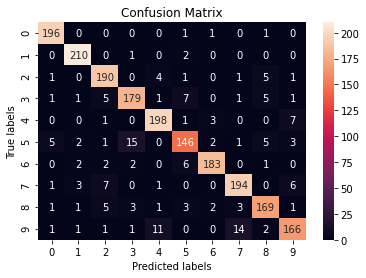

In [33]:
# Plotting confusion matrix source: https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels
cm = confusion_matrix(y_test, y_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(CATEGORIES); ax.yaxis.set_ticklabels(CATEGORIES);


In [35]:
#classification_report(y_pred,y_test)
print(f"Accuracy of the model: {accuracy_score(y_pred,y_test)*100}%")
#confusion_matrix(y_pred,y_test)

Accuracy of the model: 91.55%


In [38]:
# Saving the model
pickle.dump(svc,open('digit_classifier.p','wb'))
print("Pickle is saved successfully")

Pickle is saved successfully


Enter URL of Image/home/prabin/Desktop/test2.png


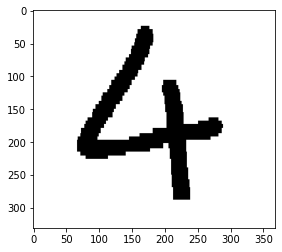

0 = 0.307%
1 = 0.507%
2 = 14.629%
3 = 0.83%
4 = 44.288%
5 = 1.761%
6 = 27.306%
7 = 5.455%
8 = 0.519%
9 = 4.399%
The predicted image is : 4


In [51]:
#print(os.path.abspath(os.getcwd()))
model=pickle.load(open('digit_classifier.p','rb'))

url=input('Enter URL of Image')
img=imread(url)
plt.imshow(img)
plt.show()
img_resize=resize(img,(28,28,3))
l=[img_resize.flatten()]
probability=model.predict_proba(l)
for ind,val in enumerate(CATEGORIES):
    print(f'{val} = {(probability[0][ind]*100).round(3)}%')
print("The predicted image is : "+CATEGORIES[model.predict(l)[0]])